## TP1 :  Difféerences finies pour options à barriéres

## Partie 1 :  Implémentation des différents schémas :

In [59]:
import numpy as np 
import matplotlib.pyplot as plt 
import math 

from mpl_toolkits.mplot3d import Axes3D

### Implémentation Des 3 schémas : 

In [60]:
def mat_A(N):
    A = np.zeros((N , N))
    for i in range(N - 1) :
        A[i , i]  = 2
        A[i + 1 , i] = - 1
        A[i , i + 1] = - 1
    A[N -1 , N - 1] = 2
    return A
    
def mat_B(N , alhpa , beta) :
    B = np.zeros(N)
    B[0 ] = alhpa
    B[N - 1]  = beta
    return B
    
        

def schema(N  , M , phi  , alpha , beta  , a, b  , T , sigma , update ) :
    """
    
    """
    delta_X = (b - a) / (N + 1)
    delta_T = T / M
    mu = (sigma**2)*delta_T / (2*(delta_X**2))
    # x = np.array([a + n*delta_X  for n in range(0 , N+2)])
    # t = np.array([m*delta_T for m in range(0 , M + 1)])
    
    U = np.zeros((N+2 , M + 1))

    U[0] = [alpha]*(M + 1)
    U[N + 1] = [beta]*(M + 1)
    for n in range(1 , N+ 1) :
        U[n , 0] = phi(a + n*delta_X)

    # Algo :
    # I = np.eye(N)
    # A = mat_A(N)
    # B  = mat_B(N , alpha , beta)
    for m in range(1 , M):
        # U[1:N+1, m] = (I - mu*A)@U[1:N+1 , m -1] + mu*B
        U[1:N+1 , m] = update(U[1:N+1 , m -1] , mu , N ,alpha  , beta)
        
    return U


def update_explicite(U , mu , N , alpha  , beta):
    I = np.eye(N)
    A = mat_A(N)
    B  = mat_B(N , alpha , beta)
    return (I - mu*A)@U + mu*B

def update_implicite(U , mu , N , alpha  , beta):
    I = np.eye(N)
    A = I + mu*mat_A(N)  
    B  = U + mu*mat_B(N , alpha , beta)
    return np.linalg.solve(A , B)

def update_crank_nicolson(U , mu , N , alpha  , beta):
    I = np.eye(N)
    a = mat_A(N)
    A = I + (mu/2)*a  
    B  = (I - (mu/2)*a)@U + mu*mat_B(N , alpha , beta)
    return np.linalg.solve(A , B)


def choix_max_N(M , b , a , sigma , T):

    return math.floor(np.sqrt(M*(b-a) / (T*sigma**2) ) - 1 )

def plot_3d(N , M , a ,b , T , U) :
    """ 
    """

    ax = plt.axes(projection="3d")
    X = np.linspace(0 , T , M + 1)
    Y = np.linspace(a , b , N + 2)
    X , Y = np.meshgrid(X ,Y)
    ax.plot_surface(X,Y,U , cmap="hot")





#### Paramètres de Test : 

In [61]:
phi = lambda x : max(x, 0)
alpha = 0
beta = 0
a = -1
b = 1
T = 1
sigma = 0.1
N = 100
M = 100
print(choix_max_N(M , b , a , sigma , T))


140


#### Test : schéma Explicite

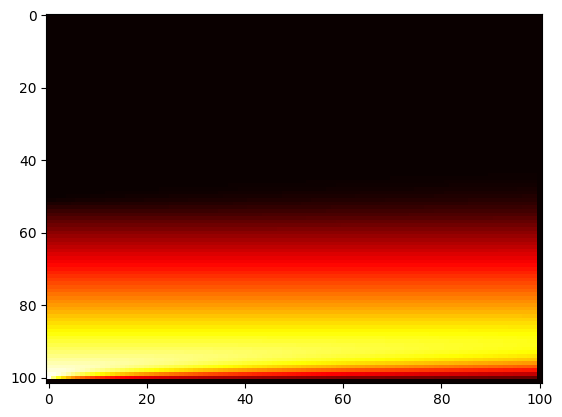

In [62]:
U_explicite = schema(N , M , phi , alpha , beta , a , b , T , sigma , update_explicite)
np.set_printoptions(precision=3, suppress=True)
# print(U_explicite)
plt.imshow(U_explicite, cmap='hot', aspect='auto', interpolation='none')





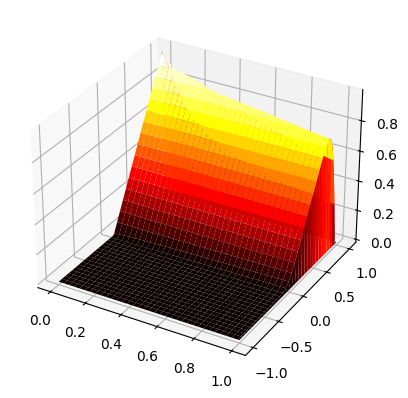

In [63]:
plot_3d(N , M , a , b , T , U_explicite)

#### Test schéma Implicite : 

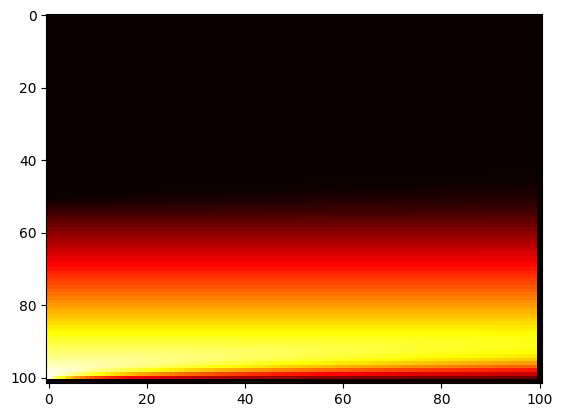

In [64]:
U_implicite = schema(N , M , phi , alpha , beta , a , b , T , sigma , update_implicite)

plt.imshow(U_implicite, cmap='hot', aspect='auto', interpolation='none')


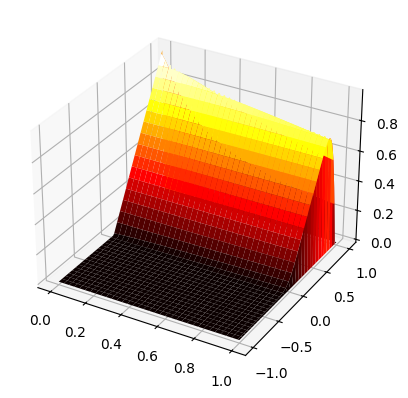

In [65]:
plot_3d(N , M , a , b , T , U_implicite)

#### Test schéma Crank Nicolson: 

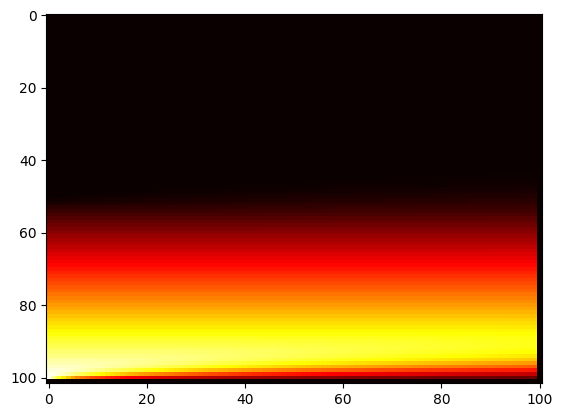

In [66]:

U_crank_nicolson = schema(N , M , phi , alpha , beta , a , b , T , sigma , update_crank_nicolson)
plt.imshow(U_crank_nicolson, cmap='hot', aspect='auto', interpolation='none')


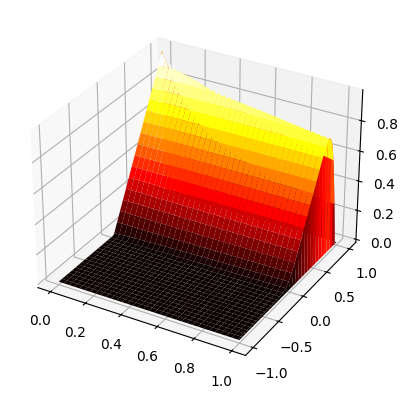

In [67]:
plot_3d(N , M , a , b , T , U_crank_nicolson)

### Stabilité : 

### Convergence :

In [99]:
p = np.random.randint(10)

phi_2 = lambda x  : np.sin(np.pi*p*(x - a) / (b -a))

u_exacte = lambda x , t , p : np.exp(-t*sigma**2/2 * (np.pi*p /(b-a))**2 )*phi_2(x)




def mean_err_relative(U ) :
    """ 
    """
    x = np.linspace(a , b , N+2)
    t = np.linspace(0 , T , M +1)
    err_relative_moyenne = 0
    for i in range(M +1 ):
        U_imp_T = U[: , i]
        U_exacte_T = np.array([u_exacte( e , t[i] , p) for e in x ])
        err_relative = np.linalg.norm(U_imp_T - U_exacte_T) / np.linalg.norm(U_exacte_T)
        err_relative_moyenne += err_relative

    err_relative_moyenne /= M

    return err_relative_moyenne


# Schéma Explicite : 
U_explicite_2 = schema(N , M , phi_2 , alpha , beta , a , b , T , sigma , update_explicite)
err_exp = mean_err_relative(U_explicite_2)
print(f"Erreur rélative Moyenne pour schéma Explicite : {err_exp}")

# schéma Implicite : 
U_implicite_2 = schema(N , M , phi_2 , alpha , beta , a , b , T , sigma , update_implicite)
err_imp = mean_err_relative(U_implicite_2)
print(f"Erreur rélative Moyenne pour schéma Implicite : {err_imp}")

# schéma Crank Nicolson : 
U_crank_nicolson_2 = schema(1000 , 1000 , phi_2 , alpha , beta , a , b , T , sigma , update_crank_nicolson)
err_crank_nico = mean_err_relative(U_crank_nicolson)
print(f"Erreur rélative Moyenne pour schéma Crank Nicolson : {err_crank_nico}")






Erreur rélative Moyenne pour schéma Explicite : 0.010000115683678267
Erreur rélative Moyenne pour schéma Implicite : 0.0100008689611373
Erreur rélative Moyenne pour schéma Crank Nicolson : 0.9064191899332619


### Partie 2 : Méthode de Monte Carlo